In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import the test and train data
df= pd.read_csv("kc_house_data_USA.csv")

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [72]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

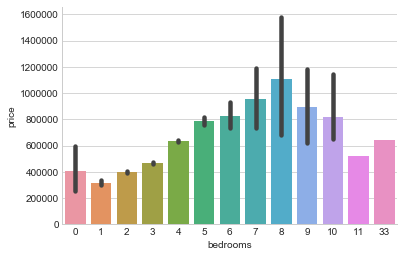

In [3]:
sns.set_style("whitegrid")
sns.set_context(font_scale=0.5,rc= {"lines.linewidth":2.5,'grid.color': '.9'})
viz_one = sns.barplot(x='bedrooms', y='price', data = df)
sns.despine()

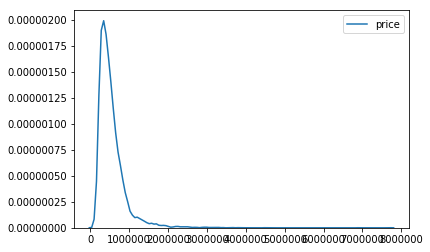

In [40]:
sns.kdeplot(df.price)

[]

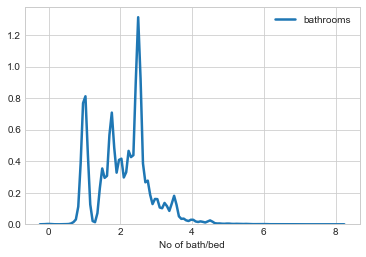

In [24]:
g = sns.kdeplot(df.bathrooms)
plt.xlabel("No of bath/bed")
plt.plot()

In [10]:
df.bathrooms.describe()

count    21613.000000
mean         7.498022
std          4.227676
min          0.000000
25%          4.500000
50%          7.000000
75%         10.000000
max         67.500000
Name: bathrooms, dtype: float64

Text(0,0.5,'Density estimate')

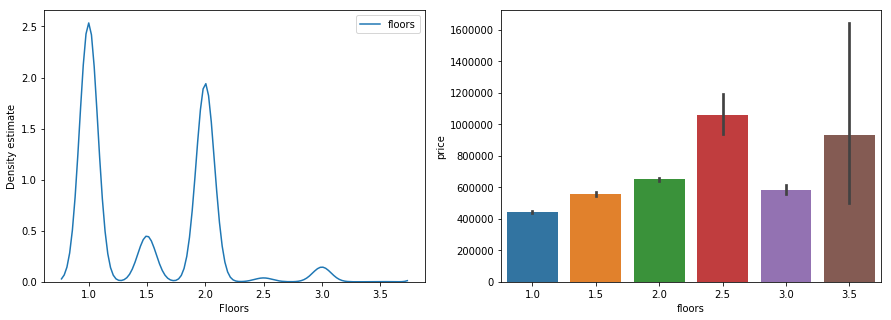

In [40]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
g1 = sns.kdeplot(df.floors)
ax2 =  f.add_subplot(122)
g1 = sns.barplot(df.floors, df.price)
#g= sns.FacetGrid(df)
ax1.set_xlabel("Floors")
ax1.set_ylabel("Density estimate")
#g = sns.barplot(df.floors, df.price)
#sns.despine()

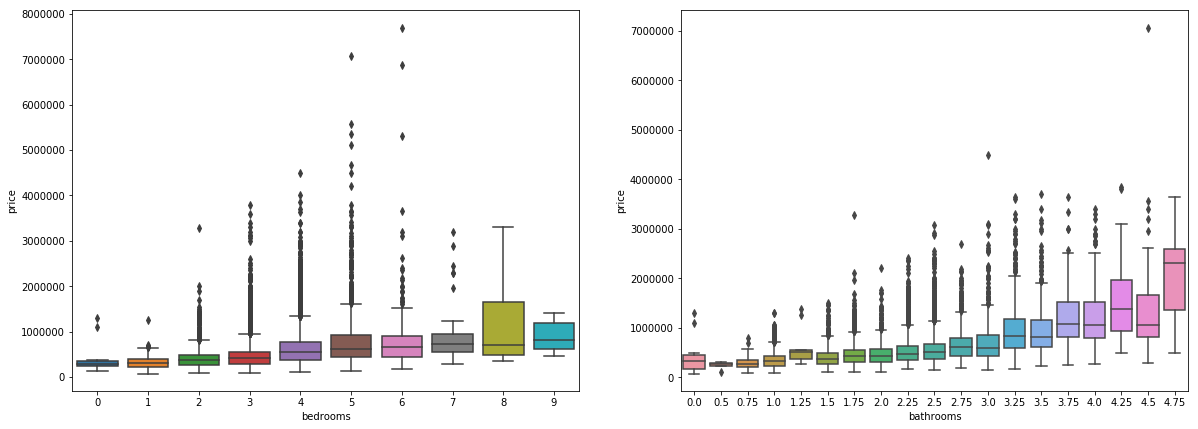

In [33]:
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.boxplot(df[df.bedrooms<10]['bedrooms'],df.price,ax = ax1,width=0.8)

g2 = sns.boxplot(df[df.bathrooms<5]['bathrooms'],df.price,ax = ax2)

<h2>Observations:</h2>
<ul>
    <li>Not many houses with 11 and 33 bedrooms, so can be removed</li>
    <li>Number of bathrooms/bedrooms for most of the houses lie between 1 to 4</li>
    <li>Very few floors with values 1.5, 2.5 and 3.5</li> 
    <li>Floors with value 3.5 maybe an outlier</li>
    <li></li>
    <li></li>
</ul>

Now let's look at features sqft_living and sqft_lot

(0, 6000)

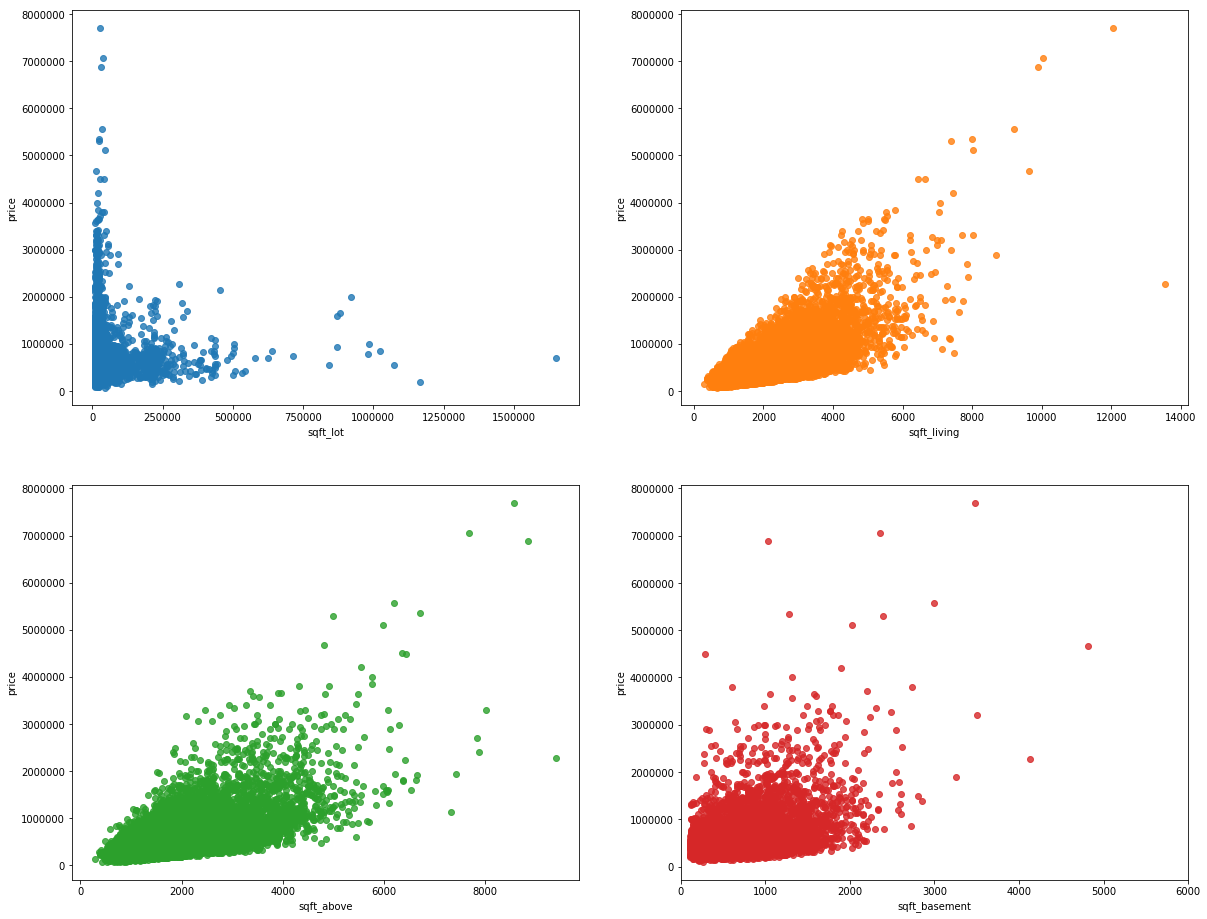

In [37]:
fig3 = plt.figure(figsize=(20,16))
ax13 = fig3.add_subplot(221)
ax14 = fig3.add_subplot(222)
ax15 = fig3.add_subplot(223)
ax16 = fig3.add_subplot(224)
g11 = sns.regplot(df[df.sqft_lot>10000].sqft_lot,df[df.sqft_lot>10000].price,fit_reg=False,ax = ax13)
g22 = sns.regplot(df.sqft_living,df.price,fit_reg=False, ax = ax14 )
g23 = sns.regplot(df.sqft_above,df.price,fit_reg=False, ax = ax15)
g24 = sns.regplot(df[df.sqft_basement>100].sqft_basement,df[df.sqft_basement>100].price,fit_reg=False, ax = ax16)
ax16.set_xlim(0,6000)
#ax13.set_xscale('log')
#ax13.set_yscale('log')
#ax22.set_xlim(0,2000)
#g11.set_xticklabels(rotation=90)

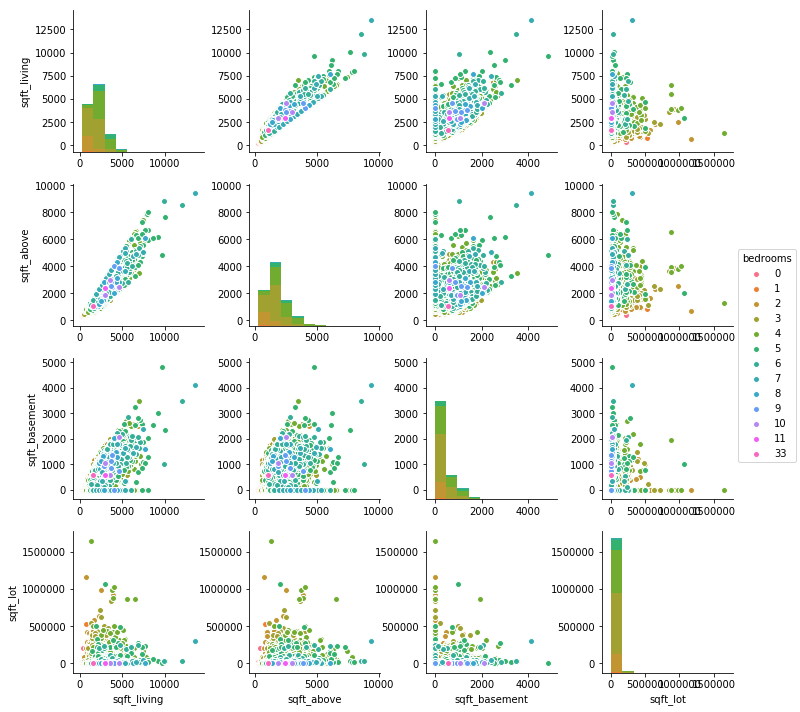

In [95]:
sns.pairplot(df,vars=["sqft_living", "sqft_above", "sqft_basement", "sqft_lot"], hue='bedrooms')


<h2>Observations:</h2>
<ul>
    <li>Basement area is scattered alot and not showing any pattern with sale price</li>
    <li>Spread is much less for Sqft_above</li>
    <li>Sqft_living and Sqgt_above have liner relationship between them</li>
</ul>
<h2>Conclusions:</h2>
<ul>
    <li>Sqft_basement feature can be dropped</li>
    <li>Sqft_lot feature can be dropped</li>
    <li>Sqft_above feature can be used for the model</li>
</ul>

In [21]:
df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12909,334009.0,4,2.00,1650,9305,1.0,334009,0,4,6,1650,1960,0,98034,47.7183,-122.213,1860,7486
7554,322500.0,3,2.00,1190,6445,1.0,322500,0,3,7,1190,1996,0,98056,47.5057,-122.172,1920,8195
14042,257000.0,2,1.00,770,9497,1.0,257000,0,3,6,770,1950,0,98133,47.7407,-122.351,1550,7532
5705,530000.0,3,2.25,1880,100623,1.5,530000,0,3,8,1880,1987,2007,98024,47.5342,-121.883,2520,21689
14510,380000.0,3,2.50,2150,25705,1.5,380000,0,3,6,2150,1980,2009,98058,47.4514,-122.089,1850,20160


In [3]:
#df = df.drop(['sqft_lot'], axis = 1)
df = df.drop(['date'], axis = 1)

In [4]:
df = df.drop(['id'], axis = 1)

In [5]:
df = df.drop(['sqft_basement'], axis = 1)

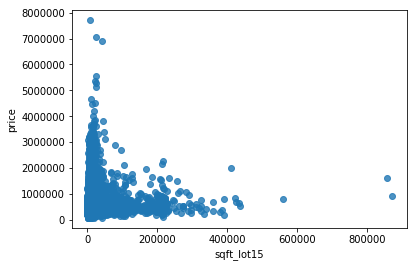

In [43]:
sns.regplot(df.sqft_lot15,df.price,fit_reg=False)

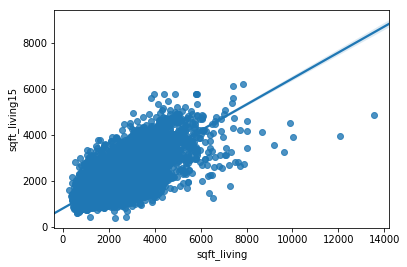

In [44]:
sns.regplot(df.sqft_living,df.sqft_living15,fit_reg=True)

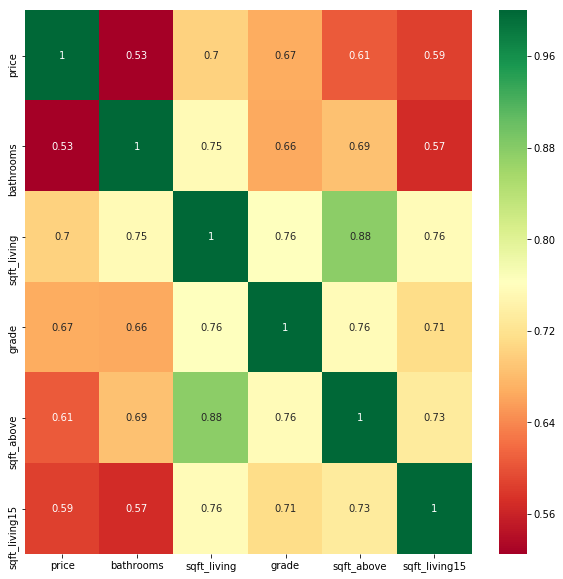

In [65]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["price"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [60]:
top_corr_features

Index(['price', 'bathrooms', 'sqft_living', 'grade', 'sqft_above',
       'sqft_living15'],
      dtype='object')

In [8]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = df.select_dtypes(include = ["object"]).columns
numerical_features = df.select_dtypes(exclude = ["object"]).columns

In [7]:
df['waterfront'] = df.astype({'waterfront':"object"})

In [9]:
categorical_features

Index(['waterfront'], dtype='object')

In [10]:
numerical_features

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

One hot encoding on categorical_features

In [12]:
train_num = df[numerical_features]

In [13]:
from scipy.stats import skew 
skewness = train_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

sqft_lot         13.059113
sqft_lot15        9.506083
yr_renovated      4.549178
price             4.023790
view              3.395514
bedrooms          1.974163
sqft_living       1.471453
sqft_above        1.446564
sqft_living15     1.108104
condition         1.032733
long              0.884992
grade             0.771050
floors            0.616134
bathrooms         0.511072
zipcode           0.405633
yr_built         -0.469773
lat              -0.485237
dtype: float64

In [18]:
skewness = skewness[abs(skewness)>0.5]
skewness.index

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'yr_renovated', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
skew_features = np.log1p(skewness)

In [15]:
df_skew = df[skewness.index]
df_skew.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


<h2>Observation:</h2>
<ul>
    <li>Yr_renovation seems to be having few values and lot of spread in price</li>
    <li>Yr_built seems to be more important than yr_ren</li>
</ul>
<h2>Conclusions:</h2>
<ul>
    <li></li>
    <li></li>
</ul>

In [ ]:
Y = train_num["price"]
train_num.drop("price", axis = 1)

In [46]:
scalar = MinMaxScaler()
num_mat = train_num.as_matrix()
X = scalar.fit_transform(train_num)



In [61]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [40]:
y_new = scalar.fit_transform(y)

In [39]:
y = np.reshape(Y, (-1,1))

C:\Users\Meghana\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [62]:
y

array([[ 221900.],
       [ 538000.],
       [ 180000.],
       ..., 
       [ 402101.],
       [ 400000.],
       [ 325000.]])

In [63]:
cols = train_num.columns

In [64]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = .3)
lasso.fit(X_train, y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
def pretty_print_linear(coefs, names = None, sort = False):
    if names.any == None:
        names = ["X%s" %x for x in range(len(coefs))]
    lst= zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x: -np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef , 3), name) for coef, name in lst)

In [66]:
lasso.coef_

array([-1413971.99756297,   332355.50558731,  1971482.55768299,
         162401.54581681,    22635.5789292 ,   320728.78845406,
         109848.74638642,  1135400.69164822,   327867.14671811,
        -310500.5964026 ,    58340.75021168,  -122041.50772526,
         373808.71241793,  -244718.90179193,   118937.52546336,
        -360643.89104983])

In [67]:
print("Lasso model: ", pretty_print_linear(lasso.coef_, cols, sort = True))

Lasso model:  1971482.558 * sqft_living + -1413971.998 * bedrooms + 1135400.692 * grade + 373808.712 * lat + -360643.891 * sqft_lot15 + 332355.506 * bathrooms + 327867.147 * sqft_above + 320728.788 * view + -310500.596 * yr_built + -244718.902 * long + 162401.546 * sqft_lot + -122041.508 * zipcode + 118937.525 * sqft_living15 + 109848.746 * condition + 58340.75 * yr_renovated + 22635.579 * floors


In [87]:
train_num_new = train_num[['sqft_living','bedrooms','grade','bathrooms','lat']]
X_new = scalar.fit_transform(train_num_new)

In [106]:
 X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.33)

In [89]:
lasso = Lasso(alpha = .3)
lasso.fit(X_train_new, y_train_new)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
lasso.predict(X_test_new)

array([  909159.35862358,   296904.43968774,  1043036.53633218, ...,
         516257.90468316,   328674.25336279,  1495228.63218653])

In [107]:
lasso.score(X_test_new, y_test_new)

0.60831599976716677

In [21]:
 df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],'C': [1, 2, 3]})

In [22]:
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [23]:
pd.get_dummies(df, prefix=['col1', 'col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [24]:
pd.get_dummies(df)

,C,A_a,A_b,B_a,B_b,B_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1
